In [2]:
!pip install datasets transformers

     |████████████████████████████████| 510 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 194 kB 95.6 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 79.4 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 79.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 69.7 MB/s eta 0:00:01
     |████████████████████████████████| 38.5 MB 80.0 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 72.0 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 70.8 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 95.1 MB/s eta 0:00:01


# IMDB 데이터 세트 불러오기

In [3]:
from datasets import load_dataset
imdb_dataset = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

# imdb 데이터 세트 토큰화

In [5]:
from datasets import load_dataset
from transformers import AutoTokenizer

# IMDB 데이터 세트셋 일부(샘플 100개) 로드적재
imdb_dataset = load_dataset("imdb", split="train[:100]")

# 토크나이저 초기화
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# 자르기와 패딩을 사용하여해 IMDB 데이터셋 데이터 세트 토큰화
tokenized_imdb_dataset = imdb_dataset.map(
lambda x: tokenizer(x["text"], truncation=True, padding="max_length")
)

print(tokenized_imdb_dataset)

# 토큰의 첫 번째 행 가져오기
first_row_tokens = tokenized_imdb_dataset[0]["input_ids"]

# 처음 10개의  토큰과 토큰에 해당하는 단어를 출력합니다.
for token in first_row_tokens[:10]:
  print(f"토큰: {token}, 단어: {tokenizer.decode([token])}")

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 100
})
토큰: 101, 단어: [CLS]
토큰: 1045, 단어: i
토큰: 12524, 단어: rented
토큰: 1045, 단어: i
토큰: 2572, 단어: am
토큰: 8025, 단어: curious
토큰: 1011, 단어: -
토큰: 3756, 단어: yellow
토큰: 2013, 단어: from
토큰: 2026, 단어: my


# Spaces 예제 코드e
Gradio 인터페이스 설정

In [6]:
!pip install gradio transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     |████████████████████████████████| 17.1 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 144 kB 73.5 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 5.9 MB/s  eta 0:00:01
     |████████████████████████████████| 60 kB 9.9 MB/s  eta 0:00:01
     |████████████████████████████████| 394 kB 65.9 MB/s eta 0:00:01
     |████████████████████████████████| 857 kB 87.0 MB/s eta 0:00:01
     |████████████████████████████████| 8.7 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 91 kB 16.8 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 73.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 74.5 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 71 kB 372 kB/s  eta 0:00:01
     |████████████████████████████████|

In [7]:
import gradio as gr
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

def sentiment_analysis(text):
    result = sentiment_pipeline(text)
    return result[0]["label"]

iface = gr.Interface(fn=sentiment_analysis, inputs="text", outputs="text")
iface.launch()

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# 일래스틱 Eland

In [22]:
!pip install eland elasticsearch seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     |████████████████████████████████| 294 kB 11.8 MB/s eta 0:00:01


# 인덱스 생성 예제

## 일래스틱서치에 접속하여 샘플 인덱스 생성

In [13]:
import getpass
from elasticsearch import Elasticsearch
from datetime import datetime

es_cloud_id = getpass.getpass('Enter Elastic Cloud ID:  ')
es_api_key = getpass.getpass('Enter cluster API key:  ')

es = Elasticsearch(cloud_id=es_cloud_id,
                   api_key=es_api_key
                   )
es.info() # 클러스터 정보가 반환돼야 합니다.

Enter Elastic Cloud ID:   ········
Enter cluster API key:   ········


ObjectApiResponse({'name': 'instance-0000000000', 'cluster_name': '858a51ccd3cb4f3784b2cdeeb6a8a790', 'cluster_uuid': 'j66L3Y0_Seyop9NZawv1xw', 'version': {'number': '8.12.2', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '48a287ab9497e852de30327444b0809e55d46466', 'build_date': '2024-02-19T10:04:32.774273190Z', 'build_snapshot': False, 'lucene_version': '9.9.2', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [18]:
mapping = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "some_field": {"type": "float"},
            "column_a": {"type": "float"},
            "column_b": {"type": "float"},
            "category": {"type": "keyword"},
            "value": {"type": "float"}
        }
    }
}

# 인덱스 생성
es.indices.create(index="sample_eland_index", body=mapping)

# 인덱스에 샘플 데이터 넣기
documents = [
    {"some_field": 95.0, "column_a": 5.0, "column_b": 10.0, "category": "A", "value": 50.0},
    {"some_field": 150.0, "column_a": 7.0, "column_b": 20.0, "category": "B", "value": 140.0},
    {"some_field": 200.0, "column_a": 8.0, "column_b": 25.0, "category": "A", "value": 200.0},
    {"some_field": 50.0, "column_a": 4.0, "column_b": 12.5, "category": "C", "value": 50.0}
]

for doc in documents:
    es.index(index="sample_eland_index", body=doc)

BadRequestError: BadRequestError(400, 'resource_already_exists_exception', 'index [sample_eland_index/Bq7dIe3sR6OcXBrGC5Nm8A] already exists')

## Eland 예제

In [19]:
import eland as ed

df = ed.DataFrame(es_client=es, es_index_pattern="sample_eland_index")
filtered_df = df[df['some_field'] > 100]
filtered_df

,category,column_a,column_b,some_field,value
O2kWu44BxZblsyYrjIwY,B,7.0,20.0,150.0,140.0
PGkWu44BxZblsyYrjIzd,A,8.0,25.0,200.0,200.0


In [20]:
average_value = df['some_field'].mean()
average_value

123.75

<Axes: xlabel='category', ylabel='value'>

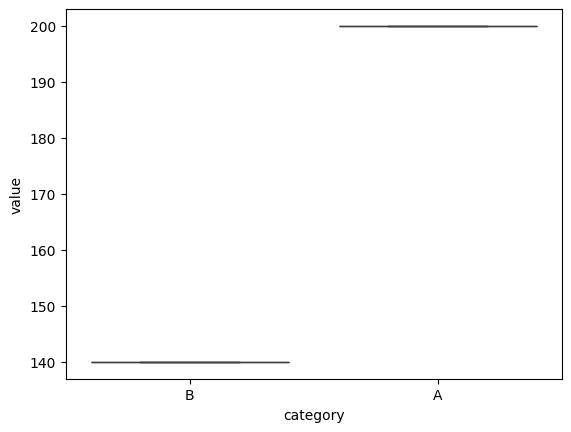

In [23]:
import seaborn as sns
import pandas as pd

filtered_df = df[df['some_field'] > 100]
pandas_df = filtered_df.to_pandas()
sns.boxplot(x='category', y='value', data=pandas_df)

# 허깅 페이스의 모델을 일래스틱서치에서 불러오기

In [24]:
pip -q install eland elasticsearch transformers sentence_transformers torch==1.13

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [26]:
from pathlib import Path
from eland.ml.pytorch import PyTorchModel
from eland.ml.pytorch.transformers import TransformerModel
from elasticsearch import Elasticsearch
from elasticsearch.client import MlClient
import getpass

In [27]:
es_cloud_id = getpass.getpass('Enter Elastic Cloud ID:  ')
es_api_key = getpass.getpass('Enter cluster API key:  ')

Enter Elastic Cloud ID:   ········
Enter cluster API key:   ········


In [28]:
es = Elasticsearch(cloud_id=es_cloud_id,
                   api_key=es_api_key
                   )
es.info() # 클러스터 정보가 반환돼야 합니다.

ObjectApiResponse({'name': 'instance-0000000000', 'cluster_name': '858a51ccd3cb4f3784b2cdeeb6a8a790', 'cluster_uuid': 'j66L3Y0_Seyop9NZawv1xw', 'version': {'number': '8.12.2', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '48a287ab9497e852de30327444b0809e55d46466', 'build_date': '2024-02-19T10:04:32.774273190Z', 'build_snapshot': False, 'lucene_version': '9.9.2', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [30]:
hf_model_id='sentence-transformers/msmarco-MiniLM-L-12-v3'
tm = TransformerModel(model_id=hf_model_id, task_type="text_embedding")

tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.72k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [31]:
es_model_id = tm.elasticsearch_model_id()
es_model_id

'sentence-transformers__msmarco-minilm-l-12-v3'

In [32]:
tmp_path = "models"
Path(tmp_path).mkdir(parents=True, exist_ok=True)
model_path, config, vocab_path = tm.save(tmp_path)

`SentenceTransformer._target_device` has been removed, please use `SentenceTransformer.device` instead.
`SentenceTransformer._target_device` has been removed, please use `SentenceTransformer.device` instead.
`SentenceTransformer._target_device` has been removed, please use `SentenceTransformer.device` instead.
`SentenceTransformer._target_device` has been removed, please use `SentenceTransformer.device` instead.


In [33]:
ptm = PyTorchModel(es, es_model_id)
ptm.import_model(model_path=model_path, config_path=None, vocab_path=vocab_path, config=config)

  0%|          | 0/127 [00:00<?, ? parts/s]

In [34]:
# 일래스틱서치에 존재하는 모델 정보 조회
m = MlClient.get_trained_models(es, model_id=es_model_id)
m.body

{'count': 1,
 'trained_model_configs': [{'model_id': 'sentence-transformers__msmarco-minilm-l-12-v3',
   'model_type': 'pytorch',
   'created_by': 'api_user',
   'version': '12.0.0',
   'create_time': 1712536684506,
   'model_size_bytes': 0,
   'estimated_operations': 0,
   'license_level': 'platinum',
   'description': "Model sentence-transformers/msmarco-MiniLM-L-12-v3 for task type 'text_embedding'",
   'tags': [],
   'metadata': {'per_allocation_memory_bytes': 553075880,
    'per_deployment_memory_bytes': 132856832},
   'input': {'field_names': ['text_field']},
   'inference_config': {'text_embedding': {'vocabulary': {'index': '.ml-inference-native-000002'},
     'tokenization': {'bert': {'do_lower_case': True,
       'with_special_tokens': True,
       'max_sequence_length': 512,
       'truncate': 'first',
       'span': -1}}}},
   'location': {'index': {'name': '.ml-inference-native-000002'}}}]}

In [37]:
s = MlClient.start_trained_model_deployment(es, model_id=es_model_id)
s.body

{'assignment': {'task_parameters': {'model_id': 'sentence-transformers__msmarco-minilm-l-12-v3',
   'deployment_id': 'sentence-transformers__msmarco-minilm-l-12-v3',
   'model_bytes': 132923217,
   'threads_per_allocation': 1,
   'number_of_allocations': 1,
   'queue_capacity': 1024,
   'cache_size': '132923217b',
   'priority': 'normal',
   'per_deployment_memory_bytes': 132856832,
   'per_allocation_memory_bytes': 553075880},
  'routing_table': {'RjjENuolQaq9UUqGv3TTCA': {'current_allocations': 1,
    'target_allocations': 1,
    'routing_state': 'started',
    'reason': ''}},
  'assignment_state': 'started',
  'start_time': '2024-04-08T00:52:38.767262118Z',
  'max_assigned_allocations': 1}}

In [38]:
stats = MlClient.get_trained_models_stats(es, model_id=es_model_id)
stats.body['trained_model_stats'][0]['deployment_stats']['nodes'][0]['routing_state']

{'routing_state': 'started'}

In [39]:
docs =  [
    {
      "text_field": "Last week I upgraded my iOS version and ever since then my phone has been overheating whenever I use your app."
    }
  ]

In [40]:
z = MlClient.infer_trained_model(es, model_id=es_model_id, docs=docs)

In [41]:
doc_0_vector = z['inference_results'][0]['predicted_value']
doc_0_vector

[-0.0038858423940837383,
 0.10948625206947327,
 0.4242308735847473,
 -0.10887448489665985,
 0.25633731484413147,
 -0.29534661769866943,
 0.0018347501754760742,
 -0.046699680387973785,
 0.08677231520414352,
 -0.10970447957515717,
 -0.2750994563102722,
 0.3343248665332794,
 0.2643328309059143,
 -0.1977582722902298,
 0.2636696994304657,
 0.12308599054813385,
 -0.4506283104419708,
 0.05021751672029495,
 -0.2036287635564804,
 0.11058211326599121,
 -0.41230615973472595,
 -0.10743962228298187,
 -0.1440887302160263,
 0.12179382145404816,
 -0.2939358055591583,
 0.2675083875656128,
 0.21124646067619324,
 0.12771844863891602,
 -0.3403320908546448,
 0.28256097435951233,
 -0.15237954258918762,
 0.28149673342704773,
 0.03042968176305294,
 0.10954304784536362,
 -0.09875897318124771,
 -0.11424277722835541,
 -0.5897467136383057,
 -0.17613078653812408,
 -0.4065176844596863,
 -0.2366773933172226,
 -0.03501327335834503,
 0.4736110270023346,
 0.08498352020978928,
 0.00856882706284523,
 0.6042564511299133,


# 차원 축소

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [49]:
# Iris 데이터 세트를 적재한다.
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 차원 축소를 위해 PCA 적용
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

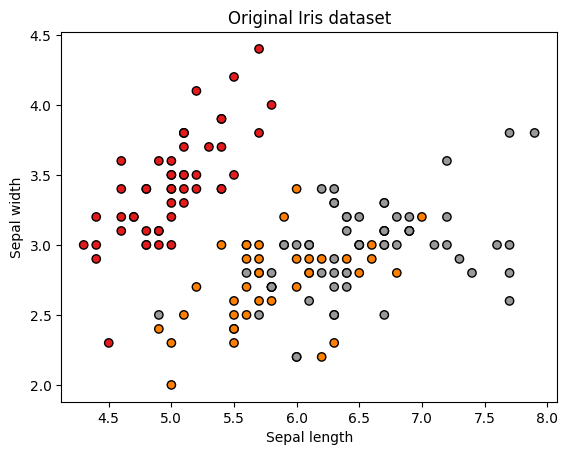

In [50]:
# 원 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Original Iris dataset')
plt.show()

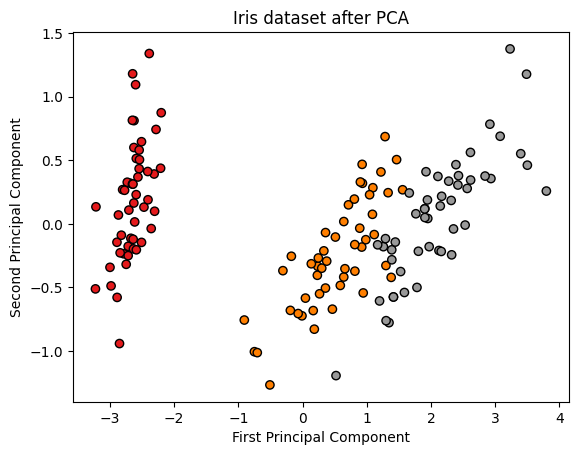

In [51]:
# 차원 축소된 데이터 시각화
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Iris dataset after PCA')
plt.show()


# 양자화

In [42]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

In [43]:
# 숫자 데이터 세트를 불러오기
digits = datasets.load_digits()
X = digits.data

# 원본 데이터 세트에서 첫 번째 예시를 출력하기
print("Original dataset (first example):\n", X[0])

Original dataset (first example):
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [45]:
# 차원 축소를 위해 PCA 적용하기
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

# PCA 적용 후 첫 번째 예시를 출력하기
print("\nReduced dataset after PCA (first example):\n", X_reduced[0])


Reduced dataset after PCA (first example):
 [-1.2594728  21.27488219 -9.46300008 13.01401771 -7.12808487 -7.44232024
  3.25070448  2.55145689 -0.58565177  3.64009486]


In [46]:
# 축소된 벡터를 [0, 255] 범위로 정규화 하기
scaler = MinMaxScaler((0, 255))
X_scaled = scaler.fit_transform(X_reduced)

# 정규화 후 첫 번째 예시를 출력하기
print("\nScaled dataset after normalization (first example):\n", X_scaled[0])


Scaled dataset after normalization (first example):
 [121.3164761  215.95550171  81.58060754 168.10152365  77.8680547
  73.74058106 132.92044763 135.84179501 121.09733405 151.0819974 ]


In [47]:
# 스케일링된 벡터를 8비트 정수로 양자화 하기
X_quantized = np.round(X_scaled).astype(np.uint8)

# 양자화 후 첫 번째 예시를 출력하기
print("\nQuantized dataset (first example):\n", X_quantized[0])


Quantized dataset (first example):
 [121 216  82 168  78  74 133 136 121 151]
